To do:
1. check that mcfadden r2 results aren't bringing biasing the mean r2 (it tends to be lower than the regular r2s) (e.g. emotion looks strange)
2. check norms that have low mean r2s within their category 
3. check r2s that are especially high on a given norm compared to other embeddings for the same norm (data leakage?)
4. Check that train_n doesn't get smaller down the dataframe for a given norm (would imply copying failed in training loop)

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Exploring RCA results

In [19]:
rca = pd.read_csv('../../data/final/rca.csv')
rca['norm'] = rca['norm'].str.replace('stratton','stration', regex=True)
rca

,embed,norm,train_n,p,r2,check
0,SVD_sim_rel,Freq_HAL,4506,300,0.089362,pass
1,SVD_sim_rel,Freq_KF,3776,300,0.036674,pass
2,SVD_sim_rel,Freq_SUBTLEXUS,4450,300,0.156546,pass
3,SVD_sim_rel,Freq_SUBTLEXUK,4472,300,0.060241,pass
4,SVD_sim_rel,Freq_Blog,4652,300,0.098733,pass
...,...,...,...,...,...,...
7301,SGSoftMaxDecoder_SWOW,goals_vanarsdall,959,300,0.403416,pass
7302,SGSoftMaxDecoder_SWOW,movement_vanarsdall,959,300,0.345155,pass
7303,SGSoftMaxDecoder_SWOW,concreteness_vanarsdall,959,300,0.132158,pass
7304,SGSoftMaxDecoder_SWOW,familiarity_vanarsdall,959,300,0.081765,pass


In [20]:
rca['r2'].describe()

count    6968.000000
mean        0.179940
std         2.220575
min       -98.244232
25%         0.006399
50%         0.311517
75%         0.534520
max         0.962694
Name: r2, dtype: float64

In [21]:
# Loading metadata
meta = pd.read_csv('../../data/raw/psychNorms_metadata.csv', index_col='norm')
meta

,Unnamed: 0,description,citation,category,associated_embed,type,n_ratings
norm,,,,,,,
Freq_HAL,0,Log10 version of frequency norms based on the ...,"Lund, K. and C. Burgess (1996). ""Producing hig...",frequency,NaN,continuous,79671
Freq_KF,1,Log10 version of frequency norms based on the ...,"Kučera, H. and W. N. Francis (1967). Computati...",frequency,NaN,continuous,35230
Freq_SUBTLEXUS,2,Log10 version of frequency norms based on the ...,"Brysbaert, M. and B. New (2009). ""Moving beyon...",frequency,NaN,continuous,57214
Freq_SUBTLEXUK,3,Log10 version of the frequency norms based on ...,"Van Heuven, W. J., et al. (2014). ""SUBTLEX-UK:...",frequency,NaN,continuous,61843
Freq_Blog,4,Log10 version of the frequency norms based on ...,"Gimenes, M. and B. New (2016). ""Worldlex: Twit...",frequency,NaN,continuous,70646
...,...,...,...,...,...,...,...
familiarity_vanarsdall,287,Ratings from 1 (highly unfamiliar) to 7 (highl...,"@article{vanarsdall2022analyzing,\n title={An...",familiarity,NaN,continuous,1200
imageability_vanarsdall,288,Ratings from 1 (low imagery) to 7 (high imagery),"@article{vanarsdall2022analyzing,\n title={An...",imageability,NaN,continuous,1200
familiarity_fear,289,Ratings from 1 (extremely infrequent) to 7 (ex...,"@article{fear1997ratings,\n title={Ratings fo...",familiarity,NaN,continuous,703


In [22]:
# Adding norm category
rca['norm_category'] = (
    rca['norm'].apply(lambda norm: meta.loc[norm]['category'])
    .replace({'_': ' ', '/': ' / '}, regex=True)
)
rca

,embed,norm,train_n,p,r2,check,norm_category
0,SVD_sim_rel,Freq_HAL,4506,300,0.089362,pass,frequency
1,SVD_sim_rel,Freq_KF,3776,300,0.036674,pass,frequency
2,SVD_sim_rel,Freq_SUBTLEXUS,4450,300,0.156546,pass,frequency
3,SVD_sim_rel,Freq_SUBTLEXUK,4472,300,0.060241,pass,frequency
4,SVD_sim_rel,Freq_Blog,4652,300,0.098733,pass,frequency
...,...,...,...,...,...,...,...
7301,SGSoftMaxDecoder_SWOW,goals_vanarsdall,959,300,0.403416,pass,animacy
7302,SGSoftMaxDecoder_SWOW,movement_vanarsdall,959,300,0.345155,pass,animacy
7303,SGSoftMaxDecoder_SWOW,concreteness_vanarsdall,959,300,0.132158,pass,concreteness
7304,SGSoftMaxDecoder_SWOW,familiarity_vanarsdall,959,300,0.081765,pass,familiarity


In [28]:
# Orders norms by category and sorts r2 from lowest to highest within each category
rca_norm = rca[['norm', 'r2', 'train_n']].groupby('norm').mean()
rca_norm['norm_category'] = rca_norm.index.map(lambda norm: meta.loc[norm]['category'])
rca_norm.sort_values(by=['norm_category', 'r2'])

,r2,train_n,norm_category
norm,,,
AoA_Kuper,-0.214695,11812.884615,age_of_acquisition
aoa_stration,-0.152399,239.653846,age_of_acquisition
aoa_khanna,-0.007862,700.807692,age_of_acquisition
aoa_marrow,0.099448,354.961538,age_of_acquisition
aoa_juhasz,0.182812,252.384615,age_of_acquisition
...,...,...,...
LexicalD_RT_V_BLP,0.213904,10549.769231,visual_lexical_decision
LexicalD_ACC_V_ECP,0.215276,18272.653846,visual_lexical_decision
LexicalD_ACC_V_BLP,0.229611,10549.769231,visual_lexical_decision


In [31]:
rca[['embed', 'norm', 'r2', 'train_n']].sort_values(by=['norm', 'r2'], ascending=[False, False])

,embed,norm,r2,train_n
4446,compo_attribs,visual_troche,0.892745,89
1074,fastTextSub_OpenSub,visual_troche,0.802692,600
3603,CBOW_GoogleNews,visual_troche,0.794018,600
6413,fastText_CommonCrawl,visual_troche,0.781761,600
5851,LexVec_CommonCrawl,visual_troche,0.772785,600
...,...,...,...,...
5493,EEG_text,Angry_Binder,-0.123050,144
6055,fMRI_speech_cos_align,Angry_Binder,-0.366669,36
3807,EEG_speech,Angry_Binder,-0.434858,95
2964,fMRI_speech_hyper_align,Angry_Binder,-3.801624,36


In [ ]:
# Checking r2s that are especially high on a given norm compared to other embeddings for the same norm
rca.groupby(['norm', 'embed']).mean().sort_values(by='r2')

In [7]:
rca.groupby(['embed', 'norm_category']).mean()

/var/folders/st/5gbrfvhn687dxwjl5_xg21t40000gq/T/ipykernel_34799/707215013.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rca.groupby(['embed', 'norm_category']).mean()


train_n       p  \
embed                      norm_category                                      
BERT_first4_Book_Wikipedia age of acquisition           1389.400000  1024.0   
                           animacy                       254.071429  1024.0   
                           arousal                      1457.888889  1024.0   
                           associatability               131.500000  1024.0   
                           autidtory lexical decision   5487.750000  1024.0   
...                                                             ...     ...   
spherical_text_Wikipedia   social / moral               1324.066667   300.0   
                           space / time / quantity       575.720000   300.0   
                           this / that                   424.000000   300.0   
                           valence                      2589.500000   300.0   
                           visual lexical decision     26198.166667   300.0   

                                                             r2  
embed                      norm_category                         
BERT_first4_Book_Wikipedia age of acquisition          0.402697  
                           animacy                     0.638429  
                           arousal                     0.415501  
                           associatability             0.377463  
                           autidtory lexical decision  0.165134  
...                                                         ...  
spherical_text_Wikipedia   social / moral              0.563805  
                           space / time / quantity     0.424308  
                           this / that                 0.512537  
                           valence                     0.557615  
                           visual lexical decision     0.445082  

[702 rows x 3 columns]

In [8]:
embed_to_type = {
    # Behavior
    'THINGS': 'behavior',
    'norms_sensorimotor': 'behavior',
    'feature_overlap': 'behavior',
    'PPMI_SVD_SWOW': 'behavior',
    'SGSoftMaxEncoder_SWOW': 'behavior',
    'SGSoftMaxDecoder_SWOW': 'behavior',
    'SVD_sim_rel': 'behavior',
    'compo_attribs': 'behavior',

    # Brain
    'eye_motor_response': 'brain',
    'EEG_speech': 'brain',
    'EEG_text': 'brain',
    'fMRI_text_cos_align': 'brain',
    'fMRI_speech_cos_align': 'brain',
    'fMRI_text_hyper_align': 'brain',
    'fMRI_speech_hyper_align': 'brain',

    # Text
    'CBOW_GoogleNews': 'text',
    'fastText_CommonCrawl': 'text',
    'fastTextSub_CommonCrawl': 'text',
    'fastText_Wiki_News': 'text',
    'fastTextSub_Wiki_News': 'text',
    'fastTextSub_OpenSub': 'text',
    'GloVe_CommonCrawl': 'text',
    'GloVe_Twitter': 'text',
    'GloVe_Wikipedia': 'text',
    'BERT_first4_Book_Wikipedia': 'text',
    'BERT_last4_Book_Wikipedia': 'text',
    'LexVec_CommonCrawl': 'text',
    'morphoNLM': 'text',
    'spherical_text_Wikipedia': 'text'
}

rca['embed_type'] = rca['embed'].map(embed_to_type)
rca

,embed,norm,train_n,p,r2,check,norm_category,embed_type
0,SVD_sim_rel,Freq_HAL,4506,300,0.089362,pass,frequency,behavior
1,SVD_sim_rel,Freq_KF,3776,300,0.036674,pass,frequency,behavior
2,SVD_sim_rel,Freq_SUBTLEXUS,4450,300,0.156546,pass,frequency,behavior
3,SVD_sim_rel,Freq_SUBTLEXUK,4472,300,0.060241,pass,frequency,behavior
4,SVD_sim_rel,Freq_Blog,4652,300,0.098733,pass,frequency,behavior
...,...,...,...,...,...,...,...,...
7301,SGSoftMaxDecoder_SWOW,goals_vanarsdall,959,300,0.403416,pass,animacy,behavior
7302,SGSoftMaxDecoder_SWOW,movement_vanarsdall,959,300,0.345155,pass,animacy,behavior
7303,SGSoftMaxDecoder_SWOW,concreteness_vanarsdall,959,300,0.132158,pass,concreteness,behavior
7304,SGSoftMaxDecoder_SWOW,familiarity_vanarsdall,959,300,0.081765,pass,familiarity,behavior


In [9]:
# Taking the embedding with the highest mean r2 from each embed_type
top_embeds = (
    rca[['embed', 'embed_type', 'r2']]
    .groupby(['embed', 'embed_type'], as_index=False)
    .mean('r2').set_index('embed')
    .groupby('embed_type').idxmax()['r2']
)    

top_embeds

embed_type
behavior           PPMI_SVD_SWOW
brain                   EEG_text
text        fastText_CommonCrawl
Name: r2, dtype: object

In [10]:
# Ordering norms by top behavior model mean r2
order = (
    rca[rca['embed'] == 'PPMI_SVD_SWOW'][['norm_category', 'r2']]
    .groupby('norm_category').mean().sort_values(by='r2')
    .index
)
rca['norm_category'] = pd.Categorical(rca['norm_category'], order)
rca = rca.sort_values(by='norm_category').reset_index(drop=True)
rca

,embed,norm,train_n,p,r2,check,norm_category,embed_type
0,fastText_CommonCrawl,meaningfulness_stratton,410,300,0.317898,pass,associatability,text
1,SGSoftMaxEncoder_SWOW,meaningfulness_ley,77,300,-0.062840,pass,associatability,behavior
2,spherical_text_Wikipedia,meaningfulness_stratton,406,300,0.323836,pass,associatability,text
3,fastText_CommonCrawl,meaningfulness_ley,228,300,0.514328,pass,associatability,text
4,PPMI_SVD_SWOW,meaningfulness_ley,77,300,-0.092590,pass,associatability,behavior
...,...,...,...,...,...,...,...,...
7301,fastText_Wiki_News,Pleasant_Binder,425,300,0.401292,pass,valence,text
7302,LexVec_CommonCrawl,valence_imbault,1827,300,0.556584,pass,valence,text
7303,fastText_CommonCrawl,valence_garrido,255,300,0.691181,pass,valence,text
7304,EEG_text,valence_citron,0,104,NaN,too few observations,valence,brain


In [11]:
# rca mean
rca_mean = (
    rca[['norm_category', 'embed', 'r2']]
    .groupby(['norm_category', 'embed'], as_index=False).mean()
)
rca_mean

,norm_category,embed,r2
0,associatability,BERT_first4_Book_Wikipedia,0.377463
1,associatability,BERT_last4_Book_Wikipedia,0.484467
2,associatability,CBOW_GoogleNews,0.221993
3,associatability,EEG_speech,-0.226026
4,associatability,EEG_text,-0.634698
...,...,...,...
697,valence,fastText_CommonCrawl,0.657290
698,valence,fastText_Wiki_News,0.628153
699,valence,morphoNLM,0.313264
700,valence,norms_sensorimotor,0.100848


## Plotting

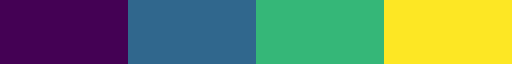

In [12]:
plt.get_cmap('viridis', 4)

In [13]:
# Colors 
cmap = plt.get_cmap('viridis', 4)
embed_type_to_color = {
    'brain': cmap(1),
    'behavior': cmap(0),
    'text': cmap(2)
}
{key: mcolors.to_hex(value) for key, value in embed_type_to_color.items()}

{'brain': '#31688e', 'behavior': '#440154', 'text': '#35b779'}

**Top embeddings**

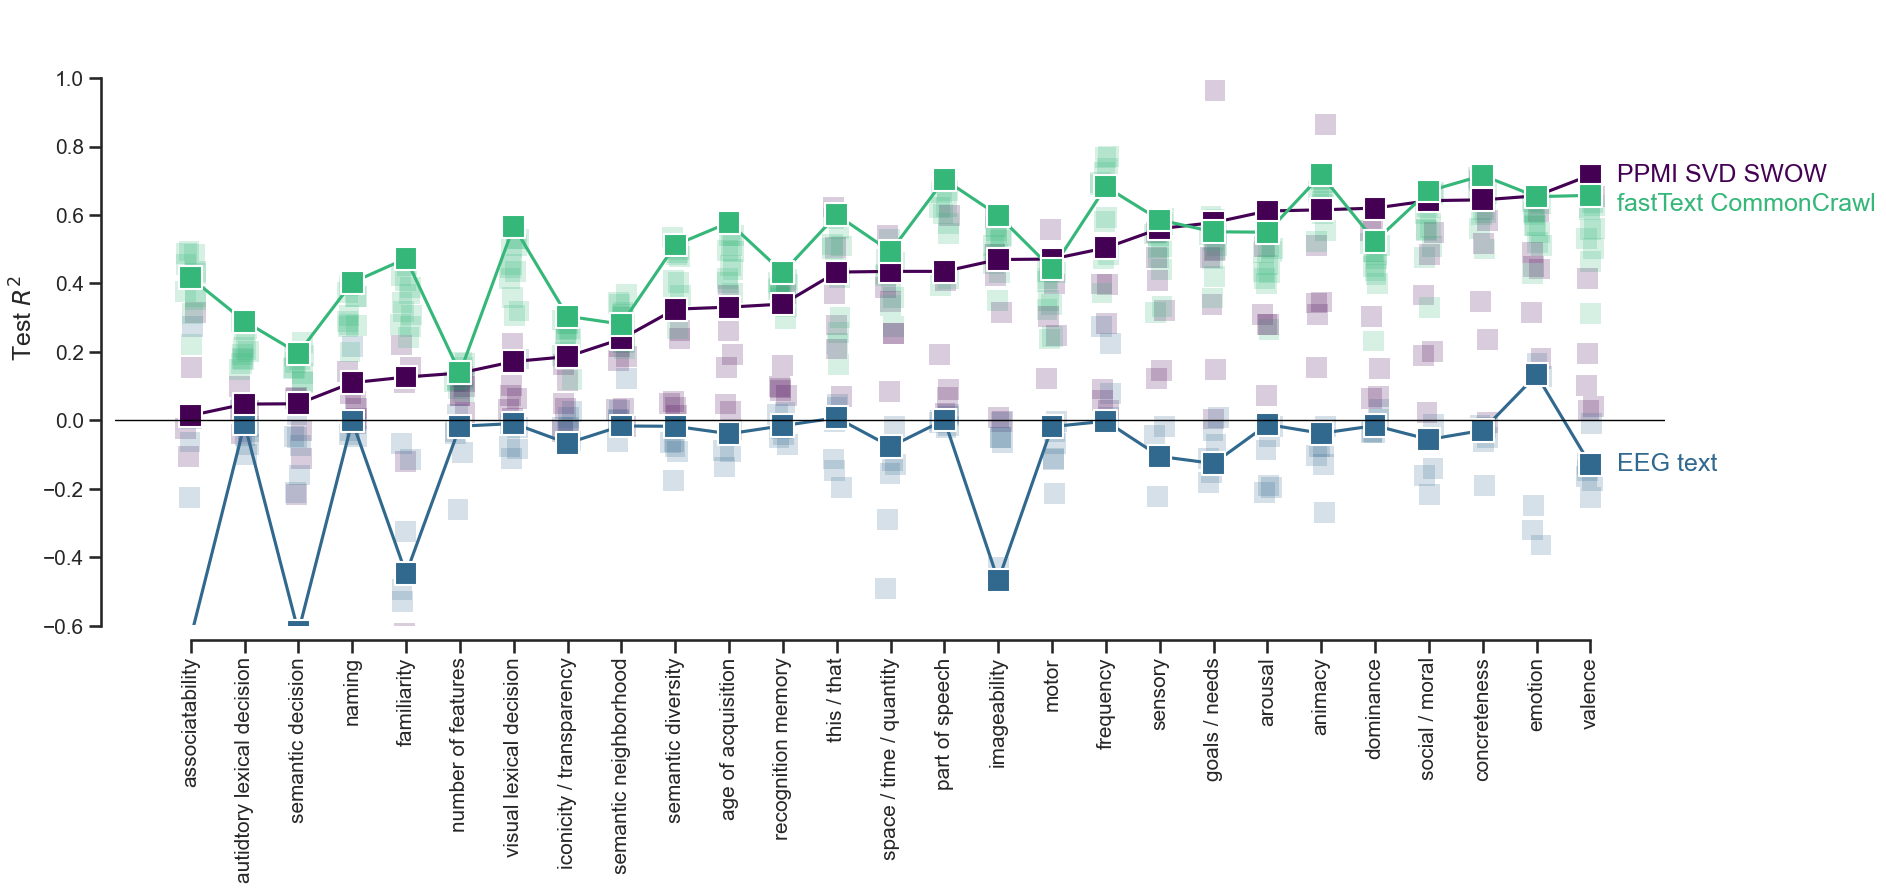

In [14]:
sns.set(context='talk', style='white')
fig, ax = plt.subplots(figsize=(20, 8))

embed_to_color = {embed : embed_type_to_color[embed_to_type[embed]] for embed in embed_to_type.keys()}

sns.stripplot(
    rca_mean.query('embed not in @top_embeds'),
    x='norm_category', y='r2', hue='embed', 
    s=15, marker='s', palette=embed_to_color, alpha=.2, 
    zorder=0, ax=ax
)

sns.lineplot(
    rca_mean.query('embed in @top_embeds'),
    x='norm_category', y='r2', hue='embed',
    palette=embed_to_color, zorder=1, ax=ax
)

# Square markers
sns.scatterplot(
    rca_mean.query('embed in @top_embeds'), marker='s',
    x='norm_category', y='r2', hue='embed',
    s=270, palette=embed_to_color, edgecolor='white', linewidth=1.5,
    zorder=2, ax=ax
)

ax.legend_.remove()

# Labelling top embeddings on the right side in line with their right hand points
occ_ys = []
for embed in top_embeds:
    x = 26.5
    y = rca_mean.query('embed == @embed')['r2'].iloc[-1]
    if occ_ys:
        while min([abs(y - occ_y) for occ_y in occ_ys]) < 0.08:
            np.random.seed(42)
            y += np.random.uniform(-0.05, 0.05)
    occ_ys.append(y)
    ax.text(x, y, embed.replace('_', ' '), ha='left', va='center', color=embed_to_color[embed], fontsize=18)


ax.set(
    ylim=(-.6, 1.2), xlabel='', ylabel='Test $R^2$',
    yticks=np.arange(-.6, 1.2, .2)
)
ax.axhline(0, color='black', lw=1)
ax.tick_params(axis='x', rotation=90, which='both', bottom=True, top=False, labelbottom=True, labelsize=15)
ax.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelsize=15)

sns.despine(offset=10, trim=True)
plt.savefig('../../figures/rca.png', dpi=300, bbox_inches='tight')